In [20]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset

# Cleaning data
penguins_df = pd.read_csv("../../assets/penguins.csv")
penguins_clean = penguins_df[penguins_df.notna().all(axis=1)]
# penguins_df.boxplot() # Outliers on flipper_length
penguins_clean = penguins_clean[(penguins_clean['flipper_length_mm'] > 0) & (penguins_clean['flipper_length_mm'] < 500)]

# Preprocessing
scaler = StandardScaler()
df = pd.get_dummies(penguins_clean)
df.drop('sex_.', axis=1, inplace=True)
penguins_preprocessed = pd.DataFrame(data=scaler.fit_transform(df), columns=df.columns)

# Dimension Reduction
pca = PCA()
pca.fit_transform(penguins_preprocessed)
n_components = np.sum(pca.explained_variance_ratio_ > 0.1)
penguins_PCA = PCA(n_components=n_components).fit_transform(penguins_preprocessed)

# KMeans clustering
n_cluster = 4
kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(penguins_PCA)
penguins_clean['label'] = kmeans.labels_

# Statistical table
stat_penguins = penguins_clean.select_dtypes(include=[np.number]).groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,45.545763,14.262712,212.779661,4683.050847
2,40.217757,17.611215,189.046729,3419.158879
3,49.473770,15.718033,221.540984,5484.836066


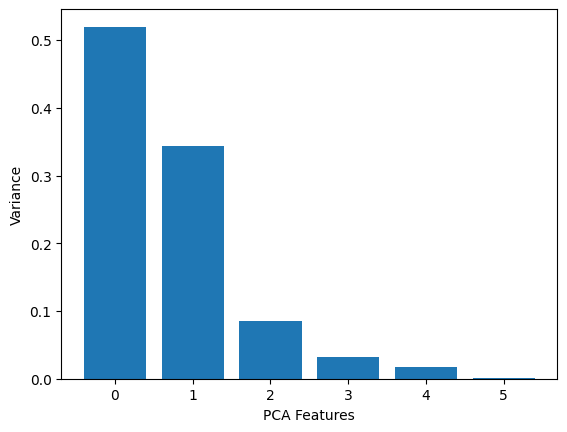

In [21]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel('PCA Features')
plt.ylabel('Variance')
plt.show()

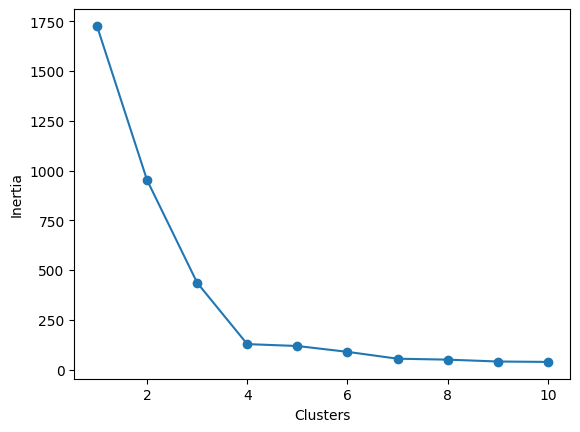

In [22]:
inertias = []
for i in range(1, 11):
    kmeans_test = KMeans(n_clusters=i, random_state=42)
    kmeans_test.fit_predict(penguins_PCA)
    inertias.append(kmeans_test.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

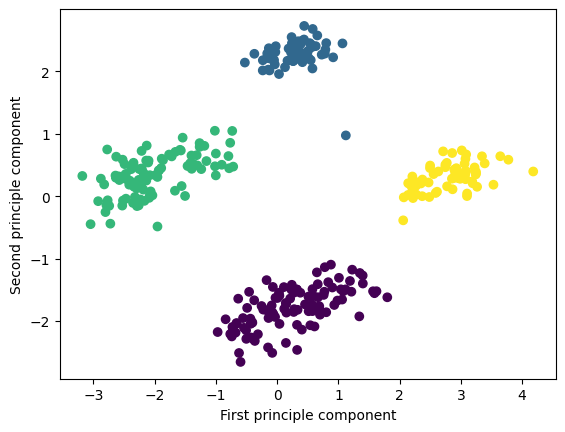

In [23]:
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.show()